In [46]:
import AudioPrediction
import pandas as pd
import joblib
import os
import time
import matplotlib.pyplot as plt

In [4]:
#Gets the current working directory and parent directory to make loading files easier
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
grandparent_dir = os.path.dirname(parent_dir)

In [5]:
#Load a dataframe containing all filenames, symptoms and demographics as required by the model
demographics = pd.read_pickle(f'{grandparent_dir}/Audio Demographics/FEMH_demographics.pkl')
demographics.head()

,ID,Sex,Age,Disease category,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,Heartburn,...,Occupational vocal demand,Diabetes,Hypertension,CAD,Head and Neck Cancer,Head injury,CVA,Voice handicap index - 10,pathology,filename
0,00002mg,1,97,3.Atrophy,0,0,0,0,0,0,...,2,0,0,0,0,0,0,12,Atrophy,Atrophy-00002mg
1,0001297,1,86,3.Atrophy,0,0,0,0,0,0,...,4,0,1,0,0,0,1,36,Atrophy,Atrophy-0001297
2,0001apo,2,45,3.Atrophy,0,0,0,1,0,0,...,3,0,0,0,0,0,0,16,Atrophy,Atrophy-0001apo
3,0001qd3,1,75,3.Atrophy,1,1,0,0,1,0,...,3,0,0,1,0,0,0,19,Atrophy,Atrophy-0001qd3
4,0002ipt,1,64,3.Atrophy,0,0,0,1,0,0,...,2,0,0,1,0,0,0,34,Atrophy,Atrophy-0002ipt


In [31]:
#Load the test files
test_files = joblib.load('FEMH_test_files.pkl')
len(test_files)

660

In [32]:
#Extracting test files from demographics
test_demographics = demographics[demographics['filename'].isin(test_files)]
test_demographics = test_demographics.reset_index(drop=True)
test_demographics.shape

(660, 30)

In [26]:
#Load in the trained classifier
trained_model = joblib.load(f'{grandparent_dir}/Pre-Trained Models/SVM/SVM_FeatureStates_Rec_Only.pkl')

In [27]:
#Define the audio directory
#audio_dir = f'{grandparent_dir}/Audio'
audio_dir = 'C://Users//maryp//OneDrive//Documents//CDT//Year4//FEMH New Data//Audio'

In [43]:
#Make predictions using the loaded trained model, make sure the feature variable is one of FeatureStates, OpenSmile, or MFCC 
#and matches the features used in the loaded model

prediction_times=[]

for idx, row in test_demographics.iterrows():
    start = time.time()
    y_pred = AudioPrediction.predict(test_demographics.loc[[idx]], trained_model, audio_dir, feature='FeatureStates', audio_col='filename')
    end = time.time()
    prediction_times.append(end - start)

Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format...
All features are as expected
Extracting features...
Making predictions...
Checking data format

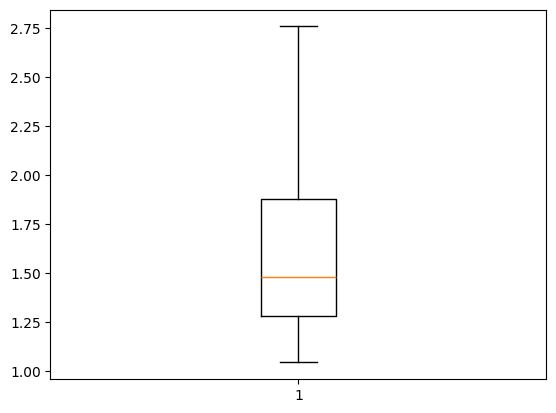

In [50]:
plt.boxplot(prediction_times, showfliers=False)
plt.show()

In [39]:
y_pred

array(['Benign'], dtype=object)